In [1]:
library(fpp3)
library(feasts)
library(glue)
library(broom)

── Attaching packages ────────────────────────────────────────────── fpp3 0.3 ──
✔ tibble      3.1.2      ✔ tsibble     0.9.3 
✔ dplyr       1.0.7      ✔ tsibbledata 0.2.0 
✔ tidyr       1.1.3      ✔ feasts      0.1.6 
✔ lubridate   1.7.10     ✔ fable       0.2.1 
✔ ggplot2     3.3.3      
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()   masks base::date()
✖ dplyr::filter()     masks stats::filter()
✖ tsibble::interval() masks lubridate::interval()
✖ dplyr::lag()        masks stats::lag()

Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse



# 1.

In [2]:
print(PBS)

# A tsibble: 65,219 x 9 [1M]
# Key:       Concession, Type, ATC1, ATC2 [336]
      Month Concession  Type   ATC1  ATC1_desc   ATC2  ATC2_desc   Scripts  Cost
      <mth> <chr>       <chr>  <chr> <chr>       <chr> <chr>         <dbl> <dbl>
 1 1991 Jul Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   18228 67877
 2 1991 Aug Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   15327 57011
 3 1991 Sep Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   14775 55020
 4 1991 Oct Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   15380 57222
 5 1991 Nov Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   14371 52120
 6 1991 Dec Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   15028 54299
 7 1992 Jan Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   11040 39753
 8 1992 Feb Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   15165 54405
 9 1992 Mar Concession… Co-pa… A     Alimentary… A01   STOMATOLOG…   16898 61108
10 1992 Apr Concession… Co-pa… A

Write the functions

In [3]:
#written function that can calculate the
#mean of a time series
calc_mean <- function(data)
{
    mean(data)
}

#written function that can calculate the
#standard deviation of a time series
calc_sd <- function(data)
{
    sd(data)
    
}

Calculate the features

In [4]:
#PBS features (mean and sd)
PBS_feat <- PBS %>%
    features(Cost, list(mean = calc_mean, sd = calc_sd)) %>%
    arrange(sd)

## Series with the highest mean:

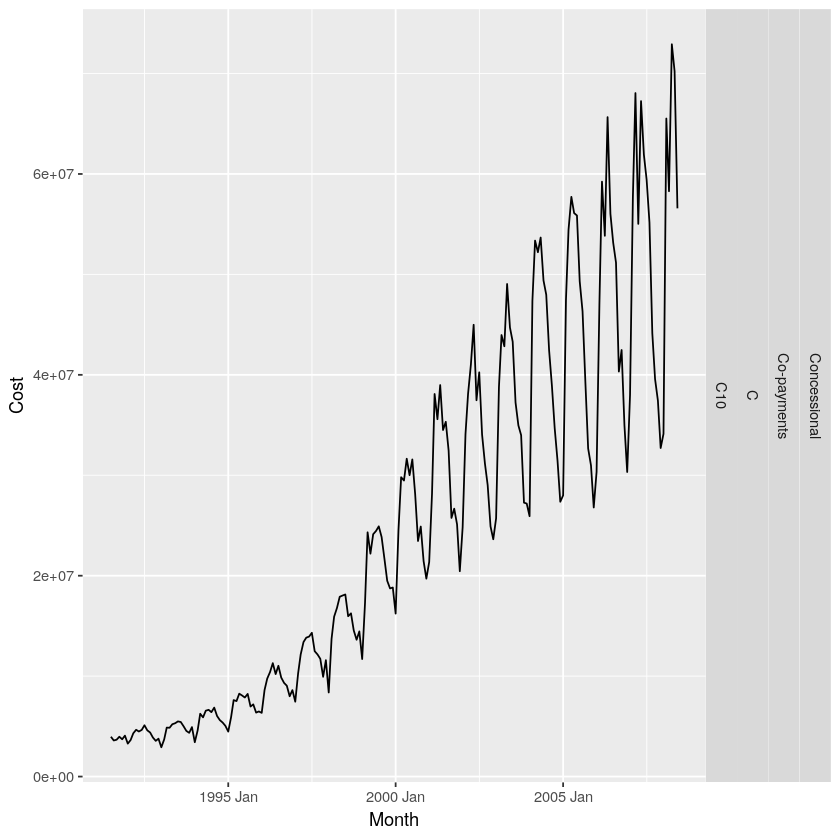

In [5]:
PBS_feat %>%
    filter(mean == max(mean)) %>%
    left_join(PBS, by = c('Concession', 'Type', 'ATC1', 'ATC2')) %>%
    ggplot(aes(x = Month, y = Cost)) + 
    geom_line() + 
    facet_grid(vars(Concession, Type, ATC1, ATC2))

## Series with the lowest standard deviation:

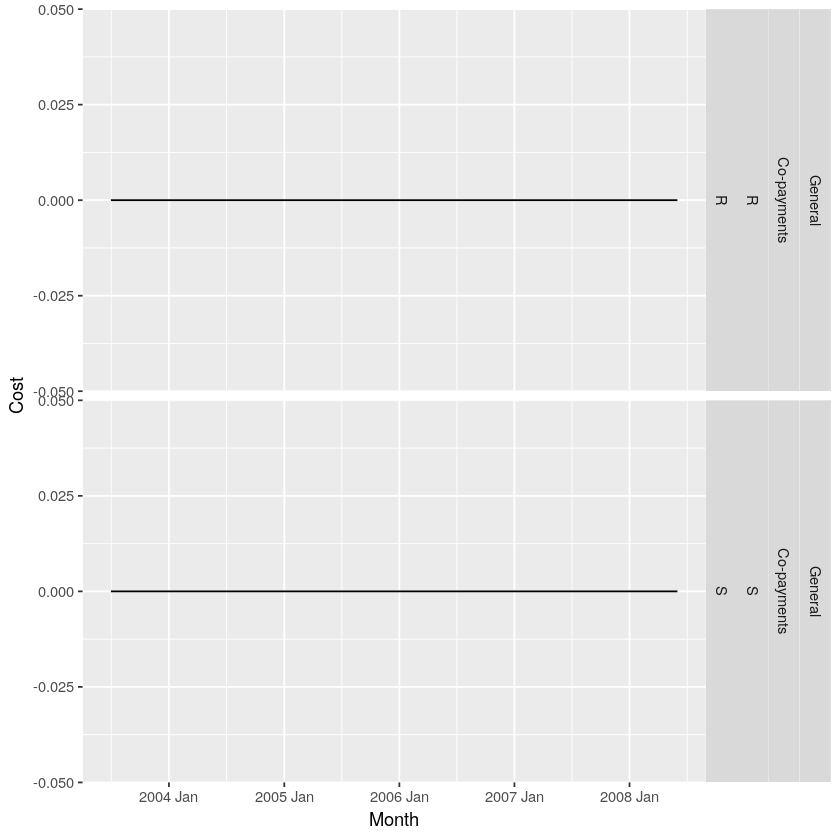

In [6]:
PBS_feat %>%
    filter(sd == min(sd)) %>%
    left_join(PBS, by = c('Concession', 'Type', 'ATC1', 'ATC2')) %>%
    ggplot(aes(x = Month, y = Cost)) + 
    geom_line() + 
    facet_grid(vars(Concession, Type, ATC1, ATC2))

In [7]:
PBS_feat %>%
    arrange(sd) %>%
    head(2)

Concession,Type,ATC1,ATC2,mean,sd
General,Co-payments,R,R,0,0
General,Co-payments,S,S,0,0


The two series with the lowest variance actually have zero variance!

# 2.

In [8]:
print(tourism)

# A tsibble: 24,320 x 5 [1Q]
# Key:       Region, State, Purpose [304]
   Quarter Region   State           Purpose  Trips
     <qtr> <chr>    <chr>           <chr>    <dbl>
 1 1998 Q1 Adelaide South Australia Business  135.
 2 1998 Q2 Adelaide South Australia Business  110.
 3 1998 Q3 Adelaide South Australia Business  166.
 4 1998 Q4 Adelaide South Australia Business  127.
 5 1999 Q1 Adelaide South Australia Business  137.
 6 1999 Q2 Adelaide South Australia Business  200.
 7 1999 Q3 Adelaide South Australia Business  169.
 8 1999 Q4 Adelaide South Australia Business  134.
 9 2000 Q1 Adelaide South Australia Business  154.
10 2000 Q2 Adelaide South Australia Business  169.
# … with 24,310 more rows


In [9]:
#compute tourism features for holiday series
tourism_features <- tourism %>%
    filter(Purpose == 'Holiday') %>%
    features(Trips, feat_stl)

In [10]:
head(tourism_features)

Region,State,Purpose,trend_strength,seasonal_strength_year,seasonal_peak_year,seasonal_trough_year,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10
Adelaide,South Australia,Holiday,0.5411193,0.6012834,1,3,9.9512719,48.88550,78.15363,-0.5114545,0.5039100
Adelaide Hills,South Australia,Holiday,0.5115746,0.2437191,2,1,0.1920763,10.39778,23.82276,-0.4772485,0.3143618
Alice Springs,Northern Territory,Holiday,0.3770119,0.8268645,3,1,0.8131590,-19.62919,10.32596,-0.5148905,0.6461633
Australia's Coral Coast,Western Australia,Holiday,0.7268580,0.2867953,3,0,16.6131577,98.11057,140.43287,-0.6039999,0.7871287
Australia's Golden Outback,Western Australia,Holiday,0.6152079,0.3629510,1,2,6.0225826,44.58971,68.74313,-0.4559577,0.5089118
Australia's North West,Western Australia,Holiday,0.7004289,0.8749335,3,1,2.2079860,-32.24198,69.61198,-0.4256844,0.6965484


Because STL generates a lot of features, I will only plot three of them: `seasonal_strength_year`, `seasonal_peak_year`, `seasonal_trough_year`

## GGally::ggpairs():

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
“Groups with fewer than two data points have been dropped.”Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


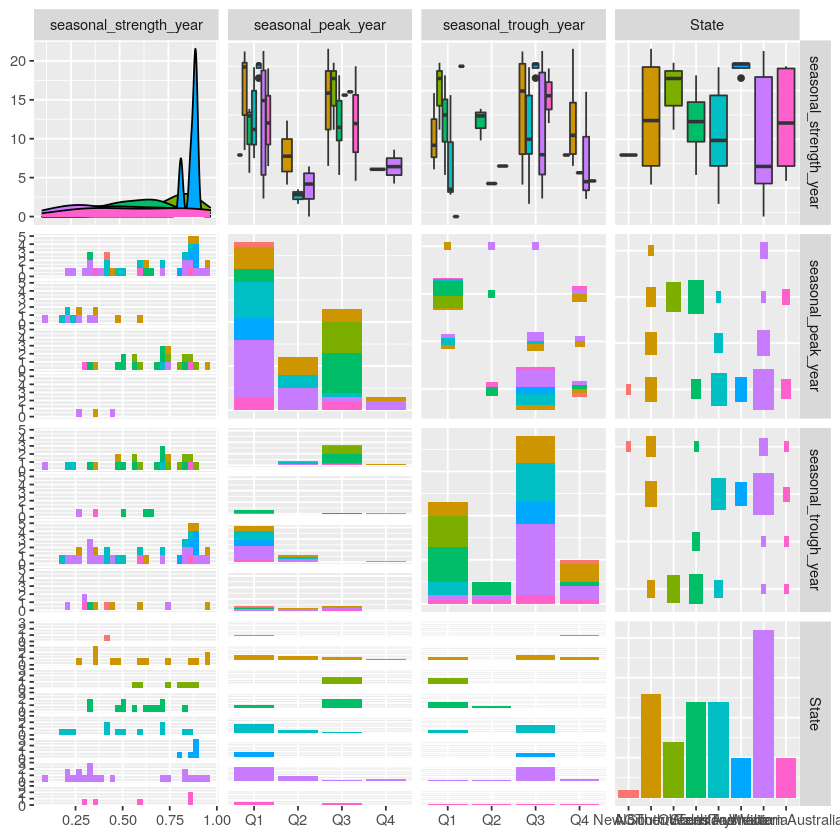

In [11]:
tourism_features %>%
  select_at(vars(contains("season"), State)) %>%
  mutate(
    seasonal_peak_year = seasonal_peak_year +
      4*(seasonal_peak_year==0),
    seasonal_trough_year = seasonal_trough_year +
      4*(seasonal_trough_year==0),
    seasonal_peak_year = glue("Q{seasonal_peak_year}"),
    seasonal_trough_year = glue("Q{seasonal_trough_year}"),
  ) %>%
  GGally::ggpairs(mapping = aes(colour = State))

In [12]:
#we will use this function to calculate the peak quarter
#for holidays by state
#the reason it's necessary to write a mode function is 
#b/c R doesn't provide a default mode summary statistic
mode <- function(x) 
{
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

## Peak Quarter for Holidays in each State:

In [13]:
tourism_features %>%
    group_by(State) %>%
    summarise('Peak Quarter for Holidays' = mode(seasonal_peak_year))

State,Peak Quarter for Holidays
ACT,1
New South Wales,1
Northern Territory,3
Queensland,3
South Australia,1
Tasmania,1
Victoria,1
Western Australia,1


All of the states have their peak quarter for holidays in quarter 1 except for Queensland and Northern Territory which have quarter 3 as their peak quarter.

# 3.

First, we compute all of the features included in the `feasts` package.

In [14]:
PBS_features <- PBS %>%
    features(Cost, feature_set(pkgs = "feasts"))

Warning message in optimise(lambda_coef_var, c(lower, upper), x = x, .period = max(.period, :
“NA/Inf replaced by maximum positive value”Warning message in optimise(lambda_coef_var, c(lower, upper), x = x, .period = max(.period, :
“NA/Inf replaced by maximum positive value”Warning message in optimise(lambda_coef_var, c(lower, upper), x = x, .period = max(.period, :
“NA/Inf replaced by maximum positive value”Warning message in optimise(lambda_coef_var, c(lower, upper), x = x, .period = max(.period, :
“NA/Inf replaced by maximum positive value”

Error in ar.burg.default(x, aic = aic, order.max = order.max, na.action = na.action,  : 
  zero-variance series
Error in ar.burg.default(x, aic = aic, order.max = order.max, na.action = na.action,  : 
  zero-variance series


Warning message:
“`n_flat_spots()` was deprecated in feasts 0.1.5.
Please use `longest_flat_spot()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Warning message:
“2 errors (1 unique) encountered for feature 7
[2] subscript out of bounds
”

We drop all columns that contain NA's which would prevent us from computing the principal components of the features.

In [15]:
PBS_features <- PBS_features[, apply(PBS_features, 2, function(x) !any(is.na(x)))]

We compute the principal components of the features.

In [16]:
pcs <- PBS_features %>%
    select(-Concession, -Type, -ATC1, -ATC2) %>%
    prcomp(scale = TRUE) %>%
    augment(PBS_features)

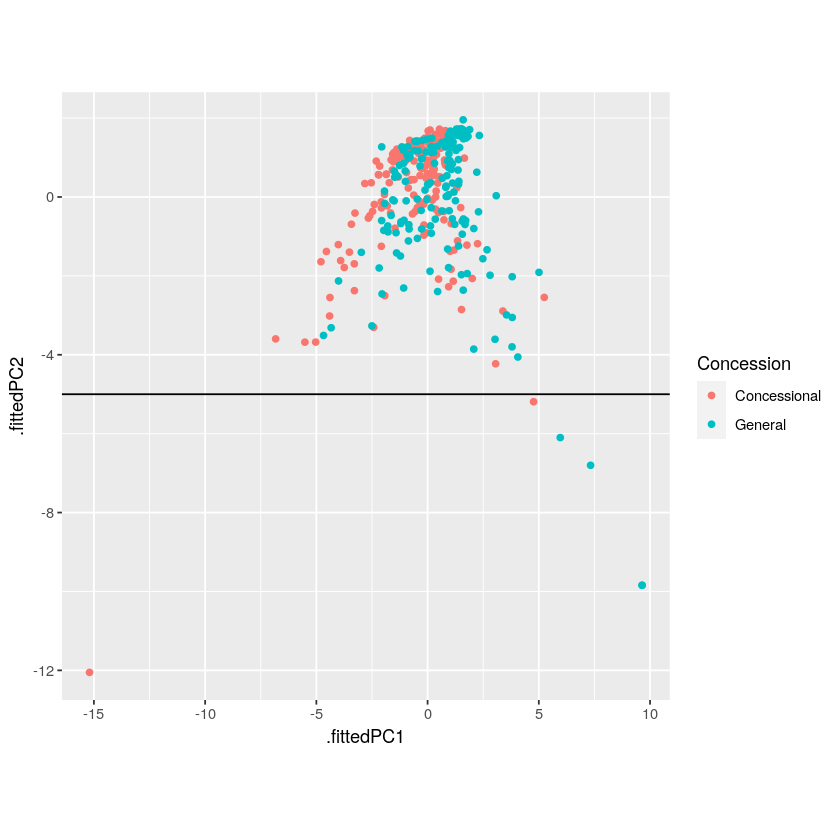

In [17]:
pcs %>%
    ggplot(aes(x = .fittedPC1, y = .fittedPC2, colour = Concession)) +
    geom_point() +
    theme(aspect.ratio = 1) +
    geom_hline(yintercept=-5)#outlier threshold

To my eyes, there are eight series that seem to differ significanltly from the others.

We'll say that a series is an outlier if it falls below PC2 = -4.

In [18]:
outliers <- pcs %>%
    filter(.fittedPC2 < -4) %>%
    select(Concession, Type, ATC1, ATC2, .fittedPC1, .fittedPC2)

In [19]:
print(outliers)

# A tibble: 8 x 6
  Concession   Type        ATC1  ATC2  .fittedPC1 .fittedPC2
  <chr>        <chr>       <chr> <chr>      <dbl>      <dbl>
1 Concessional Co-payments C     C10       -15.2      -12.1 
2 Concessional Co-payments D     D           3.06      -4.23
3 Concessional Co-payments R     R           4.77      -5.19
4 General      Co-payments D     D04         5.96      -6.10
5 General      Co-payments G     G01         4.06      -4.06
6 General      Co-payments R     R           9.64      -9.84
7 General      Co-payments S     S           9.64      -9.84
8 General      Safety net  J     J06         7.33      -6.80


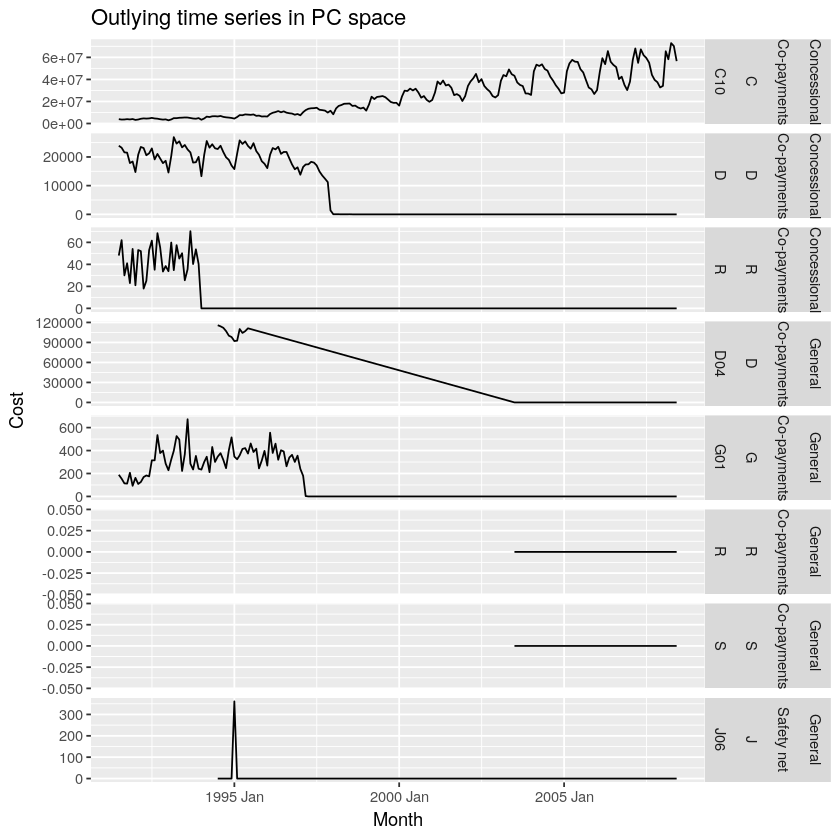

In [20]:
outliers %>%
    left_join(PBS, by = c("Concession", "Type", "ATC1", "ATC2")) %>%
    mutate(
        Series = glue("{Concession}", "{Type}", "{ATC1}", "{ATC2}", .sep = "\n\n") 
        ) %>%
    ggplot(aes(x = Month, y = Cost)) +
    geom_line() +
    facet_grid(Series ~., scales = "free") +
    labs(title = "Outlying time series in PC space")

For all of the above outlier series, except the first one, I think it's pretty self-evident what's unusual about them. As for the first series on the top, however, what is unusual about it is that it's seasonality changes over time and furthermore, the series' variance also increases over time.